In [1]:
import os
import pandas as pd
from fastbook import *
from fastai.tabular.all import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *
import sklearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

traindf = pd.read_csv('C:/Users/jsult/Desktop/spacetitanic3/train.csv',low_memory=False)
testdf = pd.read_csv('C:/Users/jsult/Desktop/spacetitanic3/test.csv',low_memory= False)
traindf['train'] = True
testdf['train'] = False
togeth = pd.concat([traindf,testdf])



c:\Users\jsult\miniconda3\envs\spacetitanic\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\jsult\miniconda3\envs\spacetitanic\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\jsult\miniconda3\envs\spacetitanic\Lib\site-packages\fastbook\__init__.py:11: UserWarning: Missing `ipywidgets` - please install it
  except ModuleNotFoundError: warn("Missing `ipywidgets` - please install it")
c:\Users\jsult\miniconda3\envs\spacetitanic\Lib\site

tester for git


if droptestnas

In [2]:
nas = list(testdf.isna().sum(axis = 1))
indexes = list(testdf.index)
keepinds = []
dropinds = []
for i in range(len(indexes)):
    if nas[i] == 0:
        keepinds.append(i)
    else:
        dropinds.append(i)
droptest = testdf.loc[dropinds].copy()
testdf = testdf.loc[keepinds].copy()

if split cryosleep

In [3]:
cryotrain = traindf[traindf.CryoSleep == True].copy()
cryotest = testdf[testdf.CryoSleep == True].copy()

In [4]:
togeth[togeth.Cabin.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,True
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,True
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,True
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,True
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,NaN,False
4248,9223_01,Mars,True,NaN,TRAPPIST-1e,24.0,False,0.0,0.0,NaN,0.0,0.0,Weessh Sun,NaN,False
4249,9223_02,Mars,True,NaN,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Perit Sun,NaN,False
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez,NaN,False


In [5]:
togeth.loc[15]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,True
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,903.0,NaN,Glene Powery,NaN,False


Impute cabins, split group number, split names, split cabins

In [6]:
def split_group_number(df):
    df['Group'] = df['PassengerId'].apply(lambda x: x.split("_")[0] if pd.notna(x) else pd.NA)
    df.Group = df.Group.astype('float')
    df['GroupNumber'] = df['PassengerId'].apply(lambda x: x.split("_")[1] if pd.notna(x) else pd.NA)
    df.GroupNumber = df.GroupNumber.astype('float')
    return df

def split_names(df):
    # Create new columns for first name and last name
    df['FirstName'] = df['Name'].apply(lambda x: x.split()[0] if pd.notna(x) else pd.NA)
    df['LastName'] = df['Name'].apply(lambda x: x.split()[1] if pd.notna(x) else pd.NA)
    return df

def sort_df_group(df):
    df = df.sort_values(by = ['Group','GroupNumber'])
    df.reset_index(inplace = True)
    df.drop(columns = 'index',inplace = True)
    return df

def initial_splits(df):
    df = split_group_number(df)
    df = split_names(df)
    df = sort_df_group(df)
    return df


In [7]:
togeth = initial_splits(togeth)

In [8]:
with open('C:/Users/jsult/Desktop/spacetitanic3/FINALtransferred/idtocabin2.pkl', 'rb') as fp:
    idtocabin = pickle.load(fp)

def cabinimpute(df):
    for i,row in df.iterrows():
        
        if pd.isna(row.Cabin):
            if row.PassengerId in idtocabin:
                df.at[i,'Cabin'] = idtocabin[row.PassengerId]
    return togeth
def split_cabin(df):
    df['CabinDeck'] = df['Cabin'].apply(lambda x: x.split("/" )[0] if pd.notna(x) else pd.NA)
    custom_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
    df['CabinDeck'] = pd.Categorical(df['CabinDeck'], categories=custom_order, ordered=True)
    df['CabinSide'] = df['Cabin'].apply(lambda x: x.split("/")[2] if pd.notna(x) else pd.NA)
    df['CabinNum'] = df['Cabin'].apply(lambda x: int(x.split("/")[1]) if pd.notna(x) else pd.NA)
    return df

def imp_cabin_pre_splits(df):
    df = cabinimpute(df)
    df = split_cabin(df)
    return df





In [9]:
togeth = imp_cabin_pre_splits(togeth)


In [22]:
togeth[togeth.Cabin.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train,Group,GroupNumber,FirstName,LastName,CabinDeck,CabinSide,CabinNum
404,0293_01,Europa,True,NaN,TRAPPIST-1e,47.0,False,0.0,0.0,0.0,0.0,0.0,Tauxon Suptibler,NaN,False,293.0,1.0,Tauxon,Suptibler,NaN,<NA>,<NA>
421,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,False,True,310.0,1.0,Naviton,Coudered,NaN,<NA>,<NA>
479,0348_02,Mars,NaN,NaN,TRAPPIST-1e,36.0,False,520.0,0.0,1865.0,0.0,0.0,Weet Mane,True,True,348.0,2.0,Weet,Mane,NaN,<NA>,<NA>
505,0364_02,Mars,False,NaN,TRAPPIST-1e,37.0,False,731.0,0.0,517.0,50.0,0.0,Anakes Chité,NaN,False,364.0,2.0,Anakes,Chité,NaN,<NA>,<NA>
517,0374_02,Earth,False,NaN,TRAPPIST-1e,36.0,False,6.0,0.0,0.0,783.0,0.0,Tamie Sterreray,NaN,False,374.0,2.0,Tamie,Sterreray,NaN,<NA>,<NA>
1401,0992_04,Europa,False,NaN,55 Cancri e,35.0,True,8030.0,300.0,0.0,0.0,1436.0,Naosa Herpumble,False,True,992.0,4.0,Naosa,Herpumble,NaN,<NA>,<NA>
1423,1006_03,Earth,False,NaN,TRAPPIST-1e,12.0,False,0.0,0.0,0.0,0.0,0.0,Stenny Summington,True,True,1006.0,3.0,Stenny,Summington,NaN,<NA>,<NA>
1429,1011_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,1633.0,4.0,49.0,6.0,0.0,Camie Prinson,False,True,1011.0,1.0,Camie,Prinson,NaN,<NA>,<NA>
1466,1041_01,Europa,True,NaN,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,0.0,Algrafi Heedry,True,True,1041.0,1.0,Algrafi,Heedry,NaN,<NA>,<NA>
1543,1095_01,Europa,True,NaN,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Alhail Drelcate,True,True,1095.0,1.0,Alhail,Drelcate,NaN,<NA>,<NA>


In [30]:
togeth.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin             52
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
train              0
Group              0
GroupNumber        0
FirstName        294
LastName         294
CabinDeck         52
CabinSide         52
CabinNum          52
dtype: int64

## Impute certainties

Cabinside

In [23]:
def fill_cabin_side_by_group(df):
    for index, row in df.iterrows():
        if pd.isna(row['CabinSide']):
            matching_rows = togeth[togeth['Group'] == row['Group']]
            non_nan_deck = matching_rows.dropna(subset=['CabinSide'])
            if not non_nan_deck.empty:
                side_to_fill = non_nan_deck['CabinSide'].values[0]
                df.at[index, 'CabinSide'] = side_to_fill
    return df

In [24]:
togeth = fill_cabin_side_by_group(togeth)

Spending

In [25]:
cryodict = {'RoomService':0,'FoodCourt' : 0, 'ShoppingMall' : 0, 'Spa' : 0, 'VRDeck' : 0}
def fillspending0(df):
    df.loc[df.CryoSleep == True, list(cryodict.keys())] = df.loc[df.CryoSleep == True, list(cryodict.keys())].fillna(value=cryodict)
    return df

spending = ['RoomService','FoodCourt','ShoppingMall','Spa', 'VRDeck']
def spending_under_13(df):
    df.loc[df.Age < 13, spending] = df.loc[df.Age < 13, spending].fillna(0)
    return df
def spending_impute(df):
    df = fillspending0(df)
    df = spending_under_13(df)
    return df


In [26]:
togeth = spending_impute(togeth)

CryoSleep

In [27]:
def not_cryosleep_if_spending(df):
    for index, row in df[df['CryoSleep'].isna()].iterrows():
        if (row[spending] > 0).any():
            df.at[index, 'CryoSleep'] = False
    return df


In [28]:
togeth = not_cryosleep_if_spending(togeth)

HomePlanet

In [29]:
def fill_home_planet_by_last_name(df):
    for index, row in df.iterrows():
        if pd.isna(row['HomePlanet']):
            matching_rows = df[df['LastName'] == row['LastName']]
            non_nan_planet = matching_rows.dropna(subset=['HomePlanet'])
            if not non_nan_planet.empty:
                planet_to_fill = non_nan_planet['HomePlanet'].values[0]
                df.at[index, 'HomePlanet'] = planet_to_fill
    return df

def fill_home_planet_by_group(df):
    for index, row in df.iterrows():
        if pd.isna(row['HomePlanet']):
            matching_rows = df[df['Group'] == row['Group']]
            non_nan_planet = matching_rows.dropna(subset=['HomePlanet'])
            if not non_nan_planet.empty:
                planet_to_fill = non_nan_planet['HomePlanet'].values[0]
                df.at[index, 'HomePlanet'] = planet_to_fill
    return df

def home_planet_from_cabindeck_abc(df):
    df.loc[df['CabinDeck'].isin(['A', 'B', 'C']), 'HomePlanet'] = df.loc[df['CabinDeck'].isin(['A', 'B', 'C']), 'HomePlanet'].fillna('Europa')
    return df

def home_planet_from_cabindeck_g(df):
    df.loc[df['CabinDeck']== 'G', 'HomePlanet'] = df.loc[df['CabinDeck'] == 'G', 'HomePlanet'].fillna('Earth')
    return df

def homeplanet_impute(df):
    df = fill_home_planet_by_group(df)
    df = fill_home_planet_by_last_name(df)
    df = home_planet_from_cabindeck_abc(df)
    df = home_planet_from_cabindeck_g(df)
    return df


In [30]:
togeth = homeplanet_impute(togeth)

VIP

In [31]:
def not_vip_earth(df):
    df.loc[df.HomePlanet == 'Earth','VIP'] = df.loc[df.HomePlanet == 'Earth','VIP'].fillna(False)
    return df
def not_vip_underage(df):
    df.loc[df.Age < 18,'VIP'] = df.loc[df.Age < 18, 'VIP'].fillna(False)
    return df
def not_vip_mars_cryo(df):
    df.loc[(df.HomePlanet == 'Mars') & (df.CryoSleep == True),'VIP'] = df.loc[(df.HomePlanet == 'Mars') & (df.CryoSleep == True),'VIP'].fillna(False)
    return df
def not_vip_g(df):
    df.loc[df.CabinDeck == 'G','VIP'] = df.loc[df.CabinDeck == 'G','VIP'].fillna(False)
    return df
def vip_impute(df):
    df = not_vip_underage(df)
    df = not_vip_earth(df)
    df = not_vip_mars_cryo(df)
    df = not_vip_g(df)
    return df


In [32]:
togeth = vip_impute(togeth)

## Feature Engineering

spending

In [33]:
def total_ammenities(df):
    df['TotalAmmenities'] = df[['Spa','VRDeck','FoodCourt','ShoppingMall']].sum(axis = 1)
    return df


def total_cabin_ammenities(df):
    def total_cabin_ammenities_apply(row):
        if pd.isna(row.Cabin):
            return pd.NA
        samecabin = df[df.Cabin == row.Cabin]
        return np.sum(samecabin.TotalAmmenities)
    df['TotalCabinAmmenities'] = df.apply(total_cabin_ammenities_apply, axis = 1)
    return df

spends = ['Spa','FoodCourt','VRDeck','ShoppingMall','RoomService']

def total_spending(df):
    def total_spending_apply(row):
        if pd.isna(row.RoomService):
            return pd.NA
        else:
            totalspending = 0
            for item in spends:
                if not pd.isna(row[item]):
                    totalspending += row[item]
            return totalspending
    df['TotalSpending'] = df.apply(total_spending_apply, axis = 1)
    return df

def total_cabin_spending(df):
    def total_cabin_spending_apply(row):
        if pd.isna(row.Cabin):
            return pd.NA
        samecabin = df[df.Cabin == row.Cabin]
        return np.sum(samecabin.TotalSpending)
    df['TotalCabinSpending'] = df.apply(total_cabin_spending_apply, axis = 1)
    return df

def total_cabin_room_service(df):
    def total_cabin_room_service_apply(row):
        if pd.isna(row.Cabin):
            return pd.NA
        samecabin = df[df.Cabin == row.Cabin]
        return np.sum(samecabin.RoomService)
    df['TotalCabinRoomService'] = df.apply(total_cabin_room_service_apply, axis = 1)
    return df

def calculate_family_spending(df):
    # Define the columns related to spending
    spending_columns = ['VRDeck', 'Spa', 'RoomService', 'FoodCourt', 'ShoppingMall']

    # Group the DataFrame by last name and group, and calculate the total spending for each family
    family_spending = df.groupby(['LastName', 'Group'])[spending_columns].transform('sum')

    # Rename the family spending columns to distinguish them from the original columns
    family_spending.columns = [col + '_Family' for col in spending_columns]

    # Add the total family spending and total family amenities columns to the DataFrame
    df = pd.concat([df, family_spending], axis=1)

    famamenities = ['VRDeck_Family', 'Spa_Family', 'FoodCourt_Family', 'ShoppingMall_Family']
    famspending = ['VRDeck_Family', 'Spa_Family', 'RoomService_Family', 'FoodCourt_Family', 'ShoppingMall_Family']
    df['TotalFamilyAmmenities'] = df[famamenities].sum(axis=1)
    df['TotalFamilySpending'] = df[famspending].sum(axis=1)

    return df

def spendingFE(df):
    df = total_ammenities(df)
    df = total_cabin_ammenities(df)
    df = total_spending(df)
    df = total_cabin_spending(df)
    df = total_cabin_room_service(df)
    df = calculate_family_spending(df)
    return df

In [34]:
togeth = spendingFE(togeth)

GroupSize,CabinSize,Family Size, Solo Cabin

In [35]:
def group_size(df):
    def group_size_apply(row):
        group = df[df.Group == row.Group]
        return len(group)
    df['GroupSize'] = df.apply(group_size_apply, axis = 1)
    return df

def family_size(df):
    df['FamilySize'] = df.apply(lambda row: pd.NA if pd.isna(row['LastName']) else df[(df['LastName'] == row['LastName']) & (df['Group'] == row['Group'])].shape[0], axis=1)
    return df

def cabin_size(df):
    def cabin_size_apply(row):
        if pd.isna(row.Cabin):
            if row.GroupSize == 1:
                return 1
            else:
                return pd.NA
        else:
            samecabin = df[df.Cabin == row.Cabin]
            return len(samecabin)
    df['CabinSize'] = df.apply(cabin_size_apply, axis = 1)
    return df

def solo_cabin(df):
    def solo_cabin_apply(row):
        if pd.isna(row.Cabin):
            if row.GroupSize == 1:
                return True
            else:
                return pd.NA
        size = len(df[df.Cabin == row.Cabin])
        return size == 1
    df['SoloCabin'] = df.apply(solo_cabin_apply, axis = 1)
    return df

def sizeFE(df):
    df = group_size(df)
    df = family_size(df)
    df = cabin_size(df)
    df = solo_cabin(df)
    return df


In [36]:
togeth = sizeFE(togeth)

Age

In [37]:
def under_13(df):
    df['Under13'] = df['Age'].apply(lambda x: True if x < 13 else False if x >= 13 else pd.NA)
    return df

def under_18(df):
    df['Under18'] = df['Age'].apply(lambda x: True if x < 18 else False if x >= 18 else pd.NA)
    return df

def under_19(df):
    df['Under19'] = df['Age'].apply(lambda x: True if x < 19 else False if x >= 19 else pd.NA)
    return df

def ageFE(df):
    df = under_13(df)
    df = under_18(df)
    df = under_19(df)
    return df

In [38]:
togeth['Agebin'] = pd.qcut(togeth['Age'], 4)
togeth = ageFE(togeth)

# Additional Imputes Certainty

In [39]:
def not_under_18_if_vip(df):
    df['Under18'] = df.apply(lambda row: False if pd.isna(row['Age']) and row['VIP'] == True else row['Under18'], axis=1)
    return df

def not_under_13_if_spending(df):
    for index, row in df[df['Under13'].isna()].iterrows():
        if (row[spending] > 0).any():
            df.at[index, 'Under13'] = False
    return df

def age_impute(df):
    df = not_under_13_if_spending(df)
    df = not_under_18_if_vip(df)
    return df
# Call the function to update the DataFrame


def additionalimputes(df):
    df = age_impute(df)
    return df

In [40]:
togeth = additionalimputes(togeth)

## Guessing Imputations

Seems very rare for earth and F to be in CryoSleep

In [41]:
def cryosleep_if_f_and_earth(df):
    df.loc[(df['HomePlanet'] == 'Earth') & (df['CabinDeck'] == 'F'), 'CryoSleep'] = False
    return df


In [42]:
togeth = cryosleep_if_f_and_earth(togeth)

# Drop train data missing too many essential columns

## Next


In [43]:
columnscount = list(togeth.columns)
columnscount.remove('Transported')
columnscount.remove('Name')
columnscount.remove('FirstName')
columnscount.remove('LastName')
columnscount.remove('train')
columnscount.remove('Group')
columnscount.remove('GroupNumber')
columnscount.remove('PassengerId')



In [44]:
togeth[columnscount].isna().sum().sum()

4861

In [45]:
len(togeth[togeth.train==True])

8693

In [46]:
len(togeth[togeth.train==True].dropna())

7477

In [47]:
len(togeth[togeth.train == False])

4277

In [48]:
len(togeth[togeth.drop(columns = 'Transported').train==False].drop(columns = 'Transported').dropna())

3662

In [51]:
traindf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'train'],
      dtype='object')

In [56]:
essentialcolumns = list(traindf.columns)
togeth[essentialcolumns].isna().sum(axis = 1).value_counts()

0    7477
1    4806
2     640
3      47
Name: count, dtype: int64

In [50]:
togeth[columnscount].isna().sum()

HomePlanet                10
CryoSleep                134
Cabin                     52
Destination              274
Age                      270
VIP                      104
RoomService              162
FoodCourt                171
ShoppingMall             163
Spa                      166
VRDeck                   150
CabinDeck                 52
CabinSide                 22
CabinNum                  52
TotalAmmenities            0
TotalCabinAmmenities      52
TotalSpending            162
TotalCabinSpending        52
TotalCabinRoomService     52
VRDeck_Family            294
Spa_Family               294
RoomService_Family       294
FoodCourt_Family         294
ShoppingMall_Family      294
TotalFamilyAmmenities      0
TotalFamilySpending        0
GroupSize                  0
FamilySize               294
CabinSize                 30
SoloCabin                 30
Agebin                   270
Under13                  129
Under18                  268
Under19                  270
dtype: int64

In [99]:
emptydfk = empty.copy()

## Really Guessing Imputes

## FillerFunction

In [118]:
def fillerfunc(df,conds,target):
    for i,row in df[df[target].isna()].iterrows():
        go = True
        for nas in conds:
            if pd.isna(row[nas]):
                go = False
        if go:
            first = conds[0]
            a = (df[first] == row[first])
            for item in conds[1:]:
                a = a & (df[item] == row[item])
            valcounts = df[a][target].value_counts()

            if valcounts[0] > 25 and len(valcounts) == 1:
                df.loc[df.PassengerId == row.PassengerId,target] = df.loc[df.PassengerId == row.PassengerId,target].fillna(valcounts.index[0])
            elif valcounts[0] > 25 and len(valcounts) > 1 and valcounts[0] / valcounts[1] > 1.5:
                df.loc[df.PassengerId == row.PassengerId,target] = df.loc[df.PassengerId == row.PassengerId,target].fillna(valcounts.index[0])
            else:
                print("help")
                print("i",i)
                print("row",row)
                print("valcounts",valcounts.index[0])
    return df



homeplanet  - not so informed but somewhat likely

In [97]:
def fillerfunc_homeplanet_dest(df):
    return fillerfunc(df,['Destination'],'HomePlanet')


Destination

In [98]:
def fillerfunc_dest_homeplanet(df):
    return fillerfunc(df,['HomePlanet'],'Destination')

Cryosleep

if earth and E or F then not cryosleep!! or mars and d
if earth and g and trappist then cryosleep

In [ ]:
def fillerfunc_cryosleep_cabin_homeplanet_VIP(df):
    return fillerfunc(df,['HomePlanet','Cabin','VIP'],'CryoSleep')

In [902]:
for item in ['a','b','c','d','e','f','g']:
    for items in ['p','s']:
        print("")
        c = ['d1','europa']
        c.append(item)
        c.append(items)
        if sum(valuecounts('CryoSleep',c)[0]) > 20:
            v = valuecounts('CryoSleep',c)[0]
            if len(v) == 1:
                print(item,items,v)
            else:
                print(item,items,v[0] / (v[0] + v[1] + 1))
                if 0.2 < (v[0] / (v[0] + v[1] + 1)) > 0.8:
                    print(v)


a p 0.7441860465116279

a s 0.7378640776699029

b p 0.5

b s 0.5044776119402985

c p 0.6258992805755396

c s 0.6386292834890965

d p 0.6095238095238096

d s 0.673469387755102

e p 0.6285714285714286

e s 0.6721311475409836






In [789]:
valuecounts('Destination',['earth','cryo',''])[0]

Destination
TRAPPIST-1e      16
55 Cancri e       3
PSO J318.5-22     2
Name: count, dtype: int64

In [617]:
togeth[valuecounts('Destination',['europa','cryo'])[1] & (togeth.GroupSize ==1)].Destination.value_counts()

Destination
55 Cancri e      219
TRAPPIST-1e      219
PSO J318.5-22      7
Name: count, dtype: int64

In [633]:
togeth[valuecounts('Destination',['europa','notcryo'])[1] & (togeth.CabinSize >1)& (togeth.TotalCabinRoomService <1500)].Destination.value_counts()

Destination
TRAPPIST-1e      600
55 Cancri e      356
PSO J318.5-22      6
Name: count, dtype: int64

In [677]:
togeth[(togeth.Destination == 'TRAPPIST-1e') & (togeth.HomePlanet == 'Europa')].Under18.value_counts()

Under18
False    1587
True      149
Name: count, dtype: int64

In [676]:
togeth[(togeth.Destination == '55 Cancri e') & (togeth.HomePlanet == 'Europa')].Under18.value_counts()

Under18
False    1232
True       79
Name: count, dtype: int64

<Axes: >

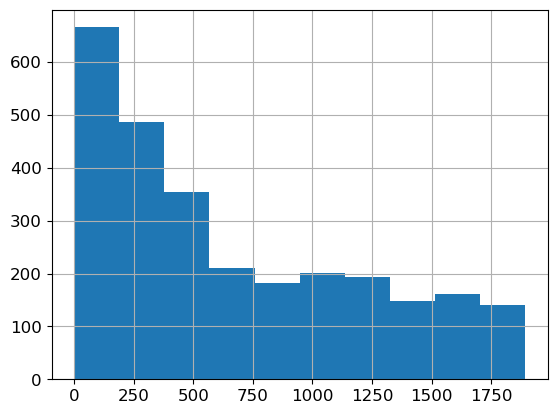

In [717]:
togeth[togeth.HomePlanet == 'Mars'].CabinNum.hist()

In [731]:
((togeth[(togeth.HomePlanet == 'Mars')].CabinNum) > 450).value_counts()

CabinNum
True     1452
False    1299
Name: count, dtype: int64

In [732]:
((togeth[(togeth.HomePlanet == 'Earth')].CabinNum) > 450).value_counts()

CabinNum
True     4799
False    2223
Name: count, dtype: int64

<Axes: >

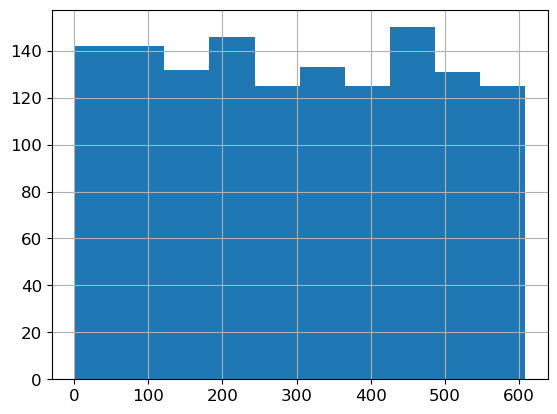

In [740]:
togeth[togeth.CabinDeck == 'E'].CabinNum.hist()

In [734]:
togeth[togeth.HomePlanet == 'Europa'].CabinDeck.value_counts()

CabinDeck
B    1166
C    1125
A     359
D     313
E     206
T      11
F       0
G       0
Name: count, dtype: int64

In [769]:
((togeth[(togeth.HomePlanet == 'Earth')].CabinNum) > 1800).value_counts()

CabinNum
False    6942
True       80
Name: count, dtype: int64

In [770]:
((togeth[(togeth.HomePlanet == 'Mars')].CabinNum) > 1800).value_counts()

CabinNum
False    2713
True       38
Name: count, dtype: int64

In [771]:
((togeth[(togeth.HomePlanet == 'Europa')].CabinNum) > 580).value_counts()

CabinNum
False    3184
True       13
Name: count, dtype: int64

In [743]:
traindf[traindf.Cabin.isna()].HomePlanet.value_counts()

HomePlanet
Earth     95
Europa    61
Mars      37
Name: count, dtype: int64

In [724]:
togeth[(togeth.HomePlanet == 'Europa') & (togeth.CabinNum > 500)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train,Group,GroupNumber,FirstName,LastName,CabinDeck,CabinSide,CabinNum,TotalAmmenities,TotalCabinAmmenities,TotalSpending,TotalCabinSpending,TotalCabinRoomService,VRDeck_Family,Spa_Family,RoomService_Family,FoodCourt_Family,ShoppingMall_Family,TotalFamilyAmmenities,TotalFamilySpending,GroupSize,FamilySize,CabinSize,SoloCabin,Agebin,Under13,Under18,Under19
10593,7581_01,Europa,False,E/503/S,TRAPPIST-1e,52.0,False,0.0,3453.0,2228.0,7.0,2342.0,Dyonif Sageng,NaN,False,7581.0,1.0,Dyonif,Sageng,E,S,503,8030.0,8030.0,8030.0,8030.0,0.0,2342.0,7.0,0.0,3453.0,2228.0,8030.0,8030.0,1,1,1,True,"(38.0, 79.0]",False,False,False
10633,7602_01,Europa,True,E/504/S,55 Cancri e,32.0,False,0.0,0.0,0.0,0.0,0.0,Canon Folumorly,NaN,False,7602.0,1.0,Canon,Folumorly,E,S,504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,True,"(27.0, 38.0]",False,False,False
11387,8162_01,Europa,False,E/524/P,TRAPPIST-1e,47.0,False,0.0,314.0,0.0,889.0,1090.0,Isotone Fringh,False,True,8162.0,1.0,Isotone,Fringh,E,P,524,2293.0,2293.0,2293.0,2293.0,0.0,1090.0,889.0,0.0,314.0,0.0,2293.0,2293.0,1,1,1,True,"(38.0, 79.0]",False,False,False
11448,8204_01,Europa,False,E/541/S,TRAPPIST-1e,25.0,False,0.0,1003.0,1629.0,73.0,748.0,Krazet Distured,False,True,8204.0,1.0,Krazet,Distured,E,S,541,3453.0,6819.0,3453.0,7028.0,209.0,1220.0,244.0,209.0,1160.0,4195.0,6819.0,7028.0,2,2,2,False,"(19.0, 27.0]",False,False,False
11449,8204_02,Europa,False,E/541/S,TRAPPIST-1e,30.0,False,209.0,157.0,2566.0,171.0,472.0,Terion Distured,False,True,8204.0,2.0,Terion,Distured,E,S,541,3366.0,6819.0,3575.0,7028.0,209.0,1220.0,244.0,209.0,1160.0,4195.0,6819.0,7028.0,2,2,2,False,"(27.0, 38.0]",False,False,False
11582,8310_01,Europa,True,E/545/S,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Azhah Hiebox,True,True,8310.0,1.0,Azhah,Hiebox,E,S,545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,True,"(27.0, 38.0]",False,False,False
11625,8342_01,Europa,False,E/548/S,TRAPPIST-1e,48.0,False,0.0,NaN,0.0,408.0,293.0,Tach Sprender,True,True,8342.0,1.0,Tach,Sprender,E,S,548,701.0,4486.0,701.0,4486.0,0.0,567.0,1702.0,0.0,2215.0,2.0,4486.0,4486.0,3,3,3,False,"(38.0, 79.0]",False,False,False
11626,8342_02,Europa,True,E/548/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Skatik Sprender,True,True,8342.0,2.0,Skatik,Sprender,E,S,548,0.0,4486.0,0.0,4486.0,0.0,567.0,1702.0,0.0,2215.0,2.0,4486.0,4486.0,3,3,3,False,"(27.0, 38.0]",False,False,False
11627,8342_03,Europa,False,E/548/S,55 Cancri e,37.0,False,0.0,2215.0,2.0,1294.0,274.0,Aldera Sprender,False,True,8342.0,3.0,Aldera,Sprender,E,S,548,3785.0,4486.0,3785.0,4486.0,0.0,567.0,1702.0,0.0,2215.0,2.0,4486.0,4486.0,3,3,3,False,"(27.0, 38.0]",False,False,False
11812,8471_01,Europa,False,E/556/S,55 Cancri e,66.0,True,0.0,1828.0,1.0,1873.0,45.0,Bosonon Metiveal,False,True,8471.0,1.0,Bosonon,Metiveal,E,S,556,3747.0,3747.0,3747.0,3747.0,0.0,45.0,1873.0,0.0,1828.0,1.0,3747.0,3747.0,1,1,1,True,"(38.0, 79.0]",False,False,False


<Axes: >

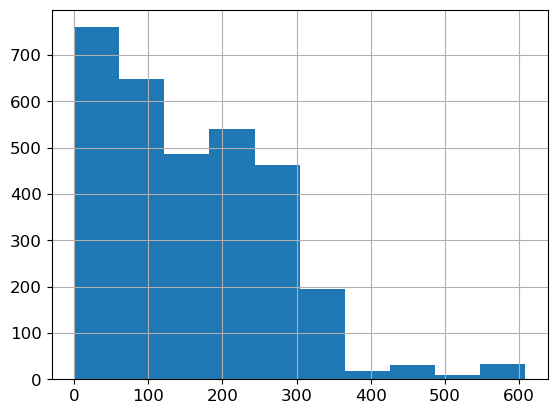

In [719]:
togeth[togeth.HomePlanet == 'Europa'].CabinNum.hist()

In [690]:
togeth[valuecounts('Destination',['europa','cryo','f'])[1] ].Destination.value_counts()

Series([], Name: count, dtype: int64)

In [442]:
togeth[(togeth.Destination.isna()) & (togeth.HomePlanet == 'Mars') ]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train,Group,GroupNumber,FirstName,LastName,CabinDeck,CabinSide,CabinNum,TotalAmmenities,TotalCabinAmmenities,TotalSpending,TotalCabinSpending,TotalCabinRoomService,VRDeck_Family,Spa_Family,RoomService_Family,FoodCourt_Family,ShoppingMall_Family,TotalFamilyAmmenities,TotalFamilySpending,GroupSize,FamilySize,CabinSize,SoloCabin,Agebin,Under13,Under18,Under19
61,0045_02,Mars,True,F/10/P,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True,True,45.0,2.0,Mass,Chmad,F,P,10,0.0,244.0,0.0,1214.0,970.0,64.0,0.0,970.0,0.0,180.0,244.0,1214.0,2,2,2,False,"(-0.001, 19.0]",False,False,False
376,0274_01,Mars,False,E/17/S,NaN,14.0,False,123.0,0.0,0.0,1936.0,22.0,Felios Melto,NaN,False,274.0,1.0,Felios,Melto,E,S,17,1958.0,1958.0,2081.0,2081.0,123.0,22.0,1936.0,123.0,0.0,0.0,1958.0,2081.0,2,2,2,False,"(-0.001, 19.0]",False,True,True
750,0536_02,Mars,False,E/35/S,NaN,37.0,False,1063.0,133.0,99.0,2.0,0.0,Blues Vloaf,NaN,False,536.0,2.0,Blues,Vloaf,E,S,35,234.0,234.0,1297.0,1297.0,1063.0,0.0,2.0,5985.0,133.0,2526.0,2661.0,8646.0,2,2,1,True,"(27.0, 38.0]",False,False,False
871,0617_01,Mars,False,F/130/P,NaN,18.0,False,1644.0,430.0,158.0,0.0,0.0,Choney Perta,NaN,False,617.0,1.0,Choney,Perta,F,P,130,588.0,588.0,2232.0,2232.0,1644.0,0.0,0.0,1644.0,430.0,158.0,588.0,2232.0,1,1,1,True,"(-0.001, 19.0]",False,False,True
877,0620_02,Mars,False,F/132/P,NaN,20.0,False,0.0,0.0,1281.0,8.0,0.0,Frunad Derte,NaN,False,620.0,2.0,Frunad,Derte,F,P,132,1289.0,3131.0,1289.0,3886.0,755.0,0.0,125.0,755.0,6.0,3000.0,3131.0,3886.0,3,3,3,False,"(19.0, 27.0]",False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12253,8783_01,Mars,False,D/276/P,NaN,18.0,False,697.0,0.0,25.0,0.0,61.0,Pebix Wate,False,True,8783.0,1.0,Pebix,Wate,D,P,276,86.0,86.0,783.0,783.0,697.0,61.0,0.0,697.0,0.0,25.0,86.0,783.0,2,2,2,False,"(-0.001, 19.0]",False,False,True
12293,8804_02,Mars,True,F/1814/P,NaN,63.0,False,0.0,0.0,0.0,0.0,0.0,Gra Sunie,NaN,False,8804.0,2.0,Gra,Sunie,F,P,1814,0.0,1965.0,0.0,2997.0,1032.0,7.0,1156.0,1032.0,78.0,724.0,1965.0,2997.0,5,3,5,False,"(38.0, 79.0]",False,False,False
12538,8980_05,Mars,False,D/273/S,NaN,73.0,False,669.0,85.0,943.0,1627.0,0.0,Wee Brie,NaN,False,8980.0,5.0,Wee,Brie,D,S,273,2655.0,3490.0,3324.0,13001.0,9511.0,0.0,1627.0,7160.0,120.0,945.0,2692.0,9852.0,7,6,7,False,"(38.0, 79.0]",False,False,False
12758,9130_01,Mars,True,F/1765/S,NaN,41.0,False,0.0,0.0,0.0,0.0,0.0,Blers Corte,True,True,9130.0,1.0,Blers,Corte,F,S,1765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,True,"(38.0, 79.0]",False,False,False


In [471]:
condition = (togeth.Age > 18) & (togeth.CryoSleep == False) & (togeth.TotalSpending < 400)


In [406]:
condition = (togeth.Age > 18) & (togeth.CryoSleep == False) & (togeth.TotalSpending < 400)

togeth.loc[condition].Destination.value_counts()

Destination
TRAPPIST-1e      182
55 Cancri e        9
PSO J318.5-22      7
Name: count, dtype: int64

In [383]:
togeth[(togeth.Age < 14) & (togeth.Age > 0)].HomePlanet.value_counts()

HomePlanet
Earth     807
Mars      223
Europa     85
Name: count, dtype: int64

In [354]:
togeth[(togeth.Destination == 'TRAPPIST-1e') & (togeth.GroupSize == 1) & (togeth.Age > 18) & (togeth.Age < 30)].HomePlanet.value_counts()

HomePlanet
Earth     1397
Mars       451
Europa     178
Name: count, dtype: int64

In [343]:
togeth[(togeth.HomePlanet.isna())][columnscount]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,CabinNum,TotalAmmenities,TotalCabinAmmenities,TotalSpending,TotalCabinSpending,TotalCabinRoomService,VRDeck_Family,Spa_Family,RoomService_Family,FoodCourt_Family,ShoppingMall_Family,TotalFamilyAmmenities,TotalFamilySpending,GroupSize,FamilySize,CabinSize,SoloCabin,Agebin,Under13,Under18,Under19
870,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,E,S,40,2607.0,2607.0,2607.0,2607.0,0.0,1025.0,1154.0,0.0,428.0,0.0,2607.0,2607.0,1,1,1,True,"(27.0, 38.0]",False,False,False
3439,NaN,False,D/72/P,TRAPPIST-1e,31.0,False,1458.0,421.0,76.0,0.0,0.0,D,P,72,497.0,497.0,1955.0,1955.0,1458.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,<NA>,1,True,"(27.0, 38.0]",False,False,False
3946,NaN,False,F/584/P,TRAPPIST-1e,25.0,False,237.0,0.0,910.0,0.0,12.0,F,P,584,922.0,922.0,1159.0,1159.0,237.0,12.0,0.0,237.0,0.0,910.0,922.0,1159.0,1,1,1,True,"(19.0, 27.0]",False,False,False
4632,NaN,False,F/631/S,TRAPPIST-1e,40.0,False,666.0,4.0,83.0,0.0,50.0,F,S,631,137.0,137.0,803.0,803.0,666.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,<NA>,1,True,"(38.0, 79.0]",False,False,False
5687,NaN,False,D/136/P,TRAPPIST-1e,26.0,False,6.0,5903.0,0.0,240.0,72.0,D,P,136,6215.0,6215.0,6221.0,6221.0,6.0,72.0,240.0,6.0,5903.0,0.0,6215.0,6221.0,1,1,1,True,"(19.0, 27.0]",False,False,False
6786,NaN,True,F/915/S,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,F,S,915,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,<NA>,1,True,"(27.0, 38.0]",False,False,False
8528,NaN,False,F/1166/S,TRAPPIST-1e,13.0,False,206.0,28.0,0.0,1.0,629.0,F,S,1166,658.0,658.0,864.0,864.0,206.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,<NA>,1,True,"(-0.001, 19.0]",False,True,True
9916,NaN,True,E/471/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,E,S,471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,True,"(27.0, 38.0]",False,False,False
11757,NaN,False,F/1730/P,TRAPPIST-1e,19.0,False,162.0,11.0,0.0,0.0,1216.0,F,P,1730,1227.0,1227.0,1389.0,1389.0,162.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,<NA>,1,True,"(-0.001, 19.0]",False,False,False
12244,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,D,P,275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,True,"(38.0, 79.0]",False,False,False


In [189]:
togeth.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'train', 'Group', 'GroupNumber', 'FirstName',
       'LastName', 'CabinDeck', 'CabinSide', 'CabinNum', 'TotalAmmenities',
       'TotalCabinAmmenities', 'TotalSpending', 'TotalCabinSpending',
       'TotalCabinRoomService', 'VRDeck_Family', 'Spa_Family',
       'RoomService_Family', 'FoodCourt_Family', 'ShoppingMall_Family',
       'TotalFamilyAmmenities', 'TotalFamilySpending', 'GroupSize',
       'FamilySize', 'CabinSize', 'SoloCabin', 'Agebin', 'Under13', 'Under18',
       'Under19'],
      dtype='object')

In [223]:
for cab in togeth.Cabin.unique():
    group = togeth[togeth.Cabin == cab]
    if len(group.Group.unique()) > 1:
        print(cab)


In [329]:
togeth[(togeth.Destination == 'PSO J318.5-22') & (togeth.CryoSleep == True)].HomePlanet.value_counts()

HomePlanet
Earth     543
Mars       16
Europa     16
Name: count, dtype: int64

In [328]:
togeth[(togeth.train == False) & (togeth.HomePlanet.isna())]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train,Group,GroupNumber,FirstName,LastName,CabinDeck,CabinSide,CabinNum,TotalAmmenities,TotalCabinAmmenities,TotalSpending,TotalCabinSpending,TotalCabinRoomService,VRDeck_Family,Spa_Family,RoomService_Family,FoodCourt_Family,ShoppingMall_Family,TotalFamilyAmmenities,TotalFamilySpending,GroupSize,FamilySize,CabinSize,SoloCabin,Agebin,Under13,Under18,Under19
870,0616_01,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,Arkaban Spriney,NaN,False,616.0,1.0,Arkaban,Spriney,E,S,40,2607.0,2607.0,2607.0,2607.0,0.0,1025.0,1154.0,0.0,428.0,0.0,2607.0,2607.0,1,1,1,True,"(27.0, 38.0]",False,False,False
5687,4052_01,NaN,False,D/136/P,TRAPPIST-1e,26.0,False,6.0,5903.0,0.0,240.0,72.0,Ankabih Coneveseng,NaN,False,4052.0,1.0,Ankabih,Coneveseng,D,P,136,6215.0,6215.0,6221.0,6221.0,6.0,72.0,240.0,6.0,5903.0,0.0,6215.0,6221.0,1,1,1,True,"(19.0, 27.0]",False,False,False
9916,7065_01,NaN,True,E/471/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Zedares Maltorted,NaN,False,7065.0,1.0,Zedares,Maltorted,E,S,471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,True,"(27.0, 38.0]",False,False,False
11757,8435_01,NaN,False,F/1730/P,TRAPPIST-1e,19.0,False,162.0,11.0,0.0,0.0,1216.0,NaN,NaN,False,8435.0,1.0,<NA>,<NA>,F,P,1730,1227.0,1227.0,1389.0,1389.0,162.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,<NA>,1,True,"(-0.001, 19.0]",False,False,False
12244,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted,NaN,False,8775.0,1.0,Raston,Maltorted,D,P,275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,True,"(38.0, 79.0]",False,False,False


## keep for checking cabins

In [327]:
print(togeth[togeth.Cabin == 'G/2/S'])
for cab in togeth.Cabin.unique():
    group = togeth[togeth.Cabin == cab]
    if len(group.Group.unique()) > 1:
        print(cab)


   PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
15     0012_01      Earth     False  G/2/S  TRAPPIST-1e  31.0  False   

    RoomService  FoodCourt  ShoppingMall  Spa  VRDeck           Name  \
15         32.0        0.0         876.0  0.0     0.0  Justie Pooles   

   Transported  train  Group  GroupNumber FirstName LastName CabinDeck  \
15       False   True   12.0          1.0    Justie   Pooles         G   

   CabinSide CabinNum  TotalAmmenities TotalCabinAmmenities TotalSpending  \
15         S        2            876.0                876.0         908.0   

   TotalCabinSpending TotalCabinRoomService  VRDeck_Family  Spa_Family  \
15              908.0                  32.0            0.0         0.0   

    RoomService_Family  FoodCourt_Family  ShoppingMall_Family  \
15                32.0               0.0                876.0   

    TotalFamilyAmmenities  TotalFamilySpending  GroupSize FamilySize  \
15                  876.0                908.0        